# MNIST 데이터셋이란

MNIST : handwritten digits dataset

우편변호 인식을 자동화하기 위해 만들어짐

각 숫자가 28 x 28 픽셀로 되어있으며, 1 channel gray image이다. 
> 기본적으로 색 정보를 channel이라고 부른다. 즉, RGB = 3 channel, RGBA = 4 channel이라고 할 수 있다. 
> 1 channel gray scale이란, 색깔을 가지고 있지 않고 밝기 정보만을 가지는 이미지라는 뜻이다. 

## torchvision

pytorch에서 사용하는 패키지 중 하나로 유명한 데이터셋, 모델 아키텍처, 이미지 변환기를 가지고 있다. 

## 용어

- epoch : 전체가 한 번의 테스트를 수행하는 것을 단위화한 것 ex. MNIST가 60,000장의 테스트 데이터가 있을 때, 60,000장에 대한 테스트를 다 했을 때를 `one epoch`이라고 한다. 
- batch size : `one epoch` 내에서 모든 데이터를 다 사용하기 힘들 때 쪼개는 크기
- iterations : `epoch`을 위해 사용된 `batch`의 수, 1 epoch = batch_size * iterations

In [4]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

device = 'cuda' if torch.cuda.is_available() else 'cpu'

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [5]:
training_epochs = 15
batch_size = 100

In [6]:
mnist_train = dsets.MNIST(root="../statics/MINST/", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root="../statics/MINST/", train=False, transform=transforms.ToTensor(), download=True)

data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

100.0%
100.0%
100.0%
100.0%


In [7]:

linear = torch.nn.Linear(784, 10, bias=True).to(device)

In [8]:
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [9]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535150588
Epoch: 0002 cost = 0.359577775
Epoch: 0003 cost = 0.331264228
Epoch: 0004 cost = 0.316404670
Epoch: 0005 cost = 0.307106972
Epoch: 0006 cost = 0.300456554
Epoch: 0007 cost = 0.294933408
Epoch: 0008 cost = 0.290956199
Epoch: 0009 cost = 0.287074119
Epoch: 0010 cost = 0.284515619
Epoch: 0011 cost = 0.281914055
Epoch: 0012 cost = 0.279526860
Epoch: 0013 cost = 0.277636617
Epoch: 0014 cost = 0.275874764
Epoch: 0015 cost = 0.274422735
Learning finished


Accuracy: 0.8883000016212463
Label:  8
Prediction:  3


/Users/janghee/Desktop/coding/python/.venv/lib/python3.13/site-packages/torchvision/datasets/mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/Users/janghee/Desktop/coding/python/.venv/lib/python3.13/site-packages/torchvision/datasets/mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


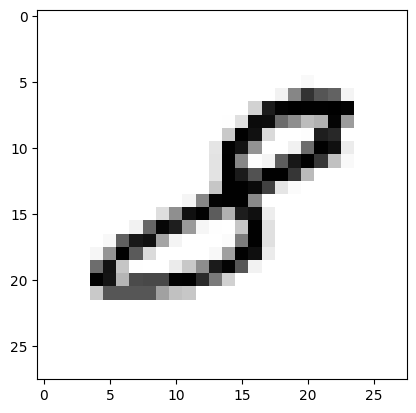

In [10]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()